In [3]:
import pandas as pd

df = pd.read_csv('./data/rate_by_city.csv')
df.head()

,Rate,City
0,13.75,1
1,13.75,1
2,13.50,1
3,13.50,1
4,13.00,1


In [7]:
df['city_count'] = df.groupby('City').cumcount()
df
rate_pivot = df.pivot(index='city_count', columns='City', values='Rate')
rate_pivot

City,1,2,3,4,5,6
city_count,,,,,,
0,13.75,14.25,14.00,15.00,14.50,13.50
1,13.75,13.00,14.00,14.00,14.00,12.25
2,13.50,12.75,13.51,13.75,14.00,12.25
3,13.50,12.50,13.50,13.59,13.90,12.00
4,13.00,12.50,13.50,13.25,13.75,12.00
5,13.00,12.40,13.25,12.97,13.25,12.00
6,13.00,12.30,13.00,12.50,13.00,12.00
7,12.75,11.90,12.50,12.25,12.50,11.90
8,12.50,11.90,12.50,11.89,12.45,11.90


In [10]:
from scipy.stats import f_oneway
f_oneway(rate_pivot[1],rate_pivot[2],rate_pivot[3],rate_pivot[4],rate_pivot[5],rate_pivot[6])



F_onewayResult(statistic=4.8293848737024, pvalue=0.001174551414504048)

In [90]:
import numpy as np

N = 1000


x0 = np.arange(0,10,10/N)
x1 = np.random.randn(N) *0.5



Text(0, 0.5, 'X1')

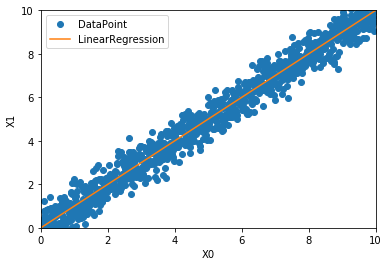

In [94]:
import matplotlib.pyplot as plt

y = (1*x0) + 1*x1 + 0

y_fit = 1*x0

plt.plot(x0,y, 'o')
plt.plot(x0,y_fit, '-')
plt.xlim(0,10)
plt.ylim(0,10)
plt.legend(["DataPoint","LinearRegression"])
plt.xlabel('X0')
plt.ylabel('X1')

In [95]:
from scipy.stats import linregress

auto = pd.read_csv('./data/auto-mpg.csv')
auto.head()

,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,"\t""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693,11.5,70,"\t""buick skylark 320"""
2,18.0,8,318.0,150.0,3436,11.0,70,"\t""plymouth satellite"""
3,16.0,8,304.0,150.0,3433,12.0,70,"\t""amc rebel sst"""
4,17.0,8,302.0,140.0,3449,10.5,70,"\t""ford torino"""


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1136cc050>,
      dtype=object)

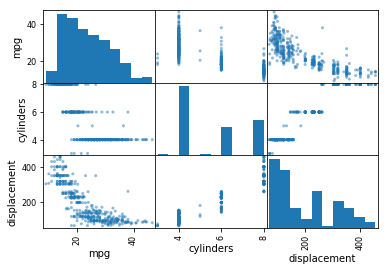

In [98]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html

pd.plotting.scatter_matrix(auto[["mpg","cylinders","displacement"]])


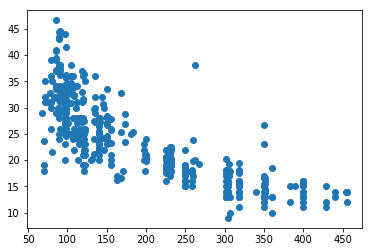

In [100]:
plt.plot(auto.displacement,auto.mpg,'o')

In [113]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(auto.displacement,auto.mpg)
print(slope, intercept, r_value, p_value, std_err)

-0.0602824054688172 35.174750154293186 -0.804202824805898 1.655888910192828e-91 0.002238841129709922


Text(0, 0.5, 'MPG')

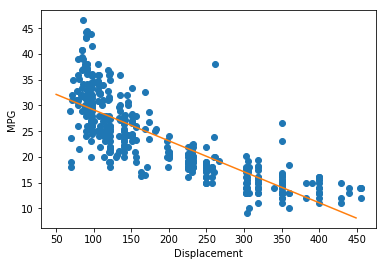

In [114]:
x = np.arange(50,450)
y = slope * x + intercept

plt.plot(auto.displacement,auto.mpg,'o')
plt.plot(x,y)
plt.xlabel('Displacement')
plt.ylabel('MPG')

LinregressResult(slope=0.03553454183670154, intercept=0.5317872884279473, rvalue=0.03788662147679526, pvalue=0.7082277475948597, stderr=0.0946759969987986)

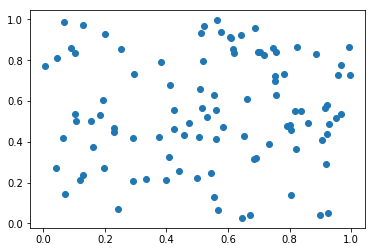

In [110]:
N = 100
a = np.random.random(N)
b = np.random.random(N)
plt.plot(a,b,'o')
linregress(a,b)

In [117]:
import statsmodels.api as sm

X = sm.add_constant(auto[['cylinders', 'weight', 'acceleration']])
Y = auto.mpg

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

print_model = model.summary()
print(print_model)


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.700
Model:                            OLS   Adj. R-squared:                  0.698
Method:                 Least Squares   F-statistic:                     306.7
Date:                Mon, 25 Nov 2019   Prob (F-statistic):          1.14e-102
Time:                        13:27:05   Log-Likelihood:                -1142.9
No. Observations:                 398   AIC:                             2294.
Df Residuals:                     394   BIC:                             2310.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           42.3811      1.960     21.627   

In [118]:
model.params

const           42.381083
cylinders       -0.482734
weight          -0.006531
acceleration     0.203443
dtype: float64

In [131]:
df = auto[['cylinders', 'weight', 'acceleration','mpg']].copy()
df.columns = ['cylinders', 'weight', 'acceleration','GT(mpg)']

df["predicted"] = model.params.const + df["cylinders"] * model.params.cylinders + df['weight'] * model.params.weight + df['acceleration'] * model.params.acceleration
df

,cylinders,weight,acceleration,GT(mpg),predicted
0,8,3504,12.0,18.0,18.075099
1,8,3693,11.5,15.0,16.738975
2,8,3436,11.0,18.0,18.315779
3,8,3433,12.0,16.0,18.538816
4,8,3449,10.5,17.0,18.129152
5,8,4341,10.0,15.0,12.201573
6,8,4354,9.0,14.0,11.913224
7,8,4312,8.5,14.0,12.085814
8,8,4425,10.0,14.0,11.652950
9,8,3850,8.5,15.0,15.103242


In [151]:
df

,cylinders,weight,acceleration,GT(mpg),predicted,diff
0,8,3504,12.0,18.0,18.075099,-0.075099
1,8,3693,11.5,15.0,16.738975,-1.738975
2,8,3436,11.0,18.0,18.315779,-0.315779
3,8,3433,12.0,16.0,18.538816,-2.538816
4,8,3449,10.5,17.0,18.129152,-1.129152
5,8,4341,10.0,15.0,12.201573,2.798427
6,8,4354,9.0,14.0,11.913224,2.086776
7,8,4312,8.5,14.0,12.085814,1.914186
8,8,4425,10.0,14.0,11.652950,2.347050
9,8,3850,8.5,15.0,15.103242,-0.103242


In [155]:
(df['diff']**2).sum()/398

18.268352921301364

In [145]:
(df["GT(mpg)"]).mean() - (df["diff"]).mean()

18.26835292297301